In [184]:
import pandas as pd
import numpy as np

FF5 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Original Data/FF5reviews_data.csv')

FF5

# select dates + make dates uniform + make ratings numerical (missing cleaned), clean missing values, remove special characters from words, make ratings numerical


,Rating,Title,Content,Author Name,Date
0,8,So far the best and most entertaining of this ...,This is the film that single-handedly got me t...,tmm_8705,"Jun 28, 2013"
1,8,Back together for round Five,Now when a long running series like The Fast A...,Terryfan,"Apr 3, 2015"
2,8,Sequels Are Getting Better Through Time,No content,eric262003,"Apr 23, 2012"
3,No rating,Best Fast & Furious movie,This is the best Fast and furious movie in my ...,0U,"Feb 23, 2020"
4,7,A fun 'RIDE',No content,tilak,"Mar 7, 2014"
...,...,...,...,...,...
544,No rating,"Still drifting away from car porn, still provi...",No content,Queer-qatfm,"Aug 28, 2011"
545,No rating,Great Racing and Action Flick,No content,Mhenegan26,"Mar 19, 2013"
546,No rating,Easily the best of the series and very fun and...,"""The guys we're after are professional runners...",cosmo_tiger,"Oct 3, 2011"
547,No rating,"This is a fun, mindless action movie. If you e...",This is a damn good action movie. You don't ne...,ty-jensen,"Aug 26, 2011"


In [185]:
#FF5 - This code chunk is to help get a preiview of the data and being with the intial cleaning of the date into datetime

print(FF5.shape, '\n')
print(FF5.dtypes, '\n')

FF5_clean = FF5

FF5_clean['Date'] = pd.to_datetime(FF5_clean['Date'])
sample = FF5_clean['Date'].dt.year
FF5_clean['Year'] = sample
#FF5_clean

print(FF5_clean["Year"].isnull().sum())





(549, 5) 

Rating         object
Title          object
Content        object
Author Name    object
Date           object
dtype: object 

0


<Axes: xlabel='Year', ylabel='Count'>

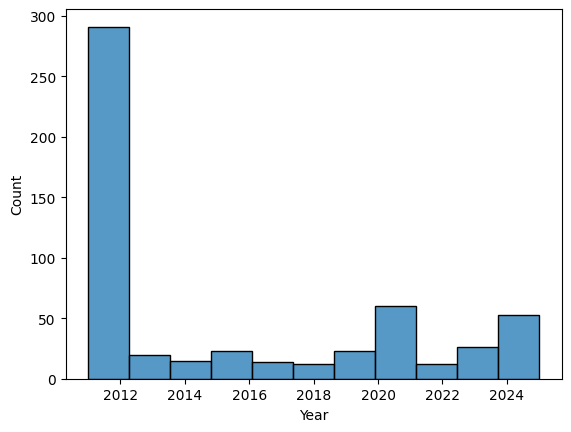

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(FF5_clean['Year']) # inital plot to see the overall distribution

In [187]:
# This code chunk is changing the data type of Rating from an object to a float to make it appropriate for further analysis
FF5_clean['Rating'] = pd.to_numeric(FF5_clean['Rating'], errors='coerce')
print(FF5.dtypes, '\n')
print(FF5_clean["Rating"].isnull().sum()) # To see how many missing values there are
print(FF5_clean["Title"].isnull().sum()) # To see how many missing values there are



Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int32
dtype: object 

38
1


In [188]:
# This code chunk is breaking down the scrapping data set into the time periods that we are interested in investigating (first four weeks vs a deacade after)
FF5_clean2011 = FF5_clean.loc[(FF5_clean["Year"] == 2011)]
FF5_clean_dec = FF5_clean.loc[(FF5_clean["Year"] >= 2021) & (FF5_clean["Year"] <= 2025)]

# Here, the missing values from Rating are filled with the mean rating value for reviews with the designated time periods
print(FF5_clean2011["Rating"].isnull().sum())
missing_val = FF5_clean2011['Rating'].median()
FF5_clean2011['Rating'] = FF5_clean2011['Rating'].fillna(missing_val)
print(FF5_clean2011["Rating"].isnull().sum())
FF5_clean2011

FF5_clean2011['Rating'].unique()

# This code puts all both datasets into one
FF5_clean2 = pd.concat([FF5_clean2011, FF5_clean_dec])
print(FF5_clean2["Rating"].isnull().sum())
print(FF5_clean2["Title"].isnull().sum())


30
0
0
0


/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_2182/2774628920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF5_clean2011['Rating'] = FF5_clean2011['Rating'].fillna(missing_val)


In [190]:
# This code chunk is to check that our handling of missing value worked and that the years in each dataset are correct
print(FF5_clean_dec["Rating"].isnull().sum())

FF5_clean_dec['Year'].unique()
print(FF5_clean2011['Year'].unique())

#FF5_clean2
print(FF5_clean_dec['Year'].unique())




0
[2011]
[2023 2021 2022 2024 2025]


In [191]:
# Exporting these as a CSV to then manually input missing Content data from IMdB
FF5_clean2
FF5_clean2.to_csv('FF5_clean2.csv')
FF5_clean2011.to_csv('FF5_clean2011.csv')
FF5_clean_dec.to_csv('FF5_clean_dec.csv')
 

In [192]:
# Once the content data from those that were missing have been manually put in by going to the IMdb website, finding the user, and copying and pasting their hidden review into the CSV file, we then reloaded that updated CSV file to continue working with it.
FF5_clean2011_2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Cleaned Data/FF5_clean2011_2.csv')
FF5_clean2011_2

FileNotFoundError: [Errno 2] No such file or directory: '/Users/borayadiul/DS-4002-Group-Projects/DATA/Cleaned Data/FF5_clean2011_2.csv'

In [110]:
# Since we reloaded the dataset, the data will have to be changed again to DATAtime
FF5_clean2011_2['Date'] = pd.to_datetime(FF5_clean2011_2['Date'])
sample1 = FF5_clean2011_2['Date'].dt.year
FF5_clean2011_2['Year'] = sample1
FF5_clean2011_2

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
0,6,7,The first sequel in the series that's actually...,"Sure the original was something fresh, new, an...",blackmambamark,2011-05-01,2011
1,8,7,Best since the original.,"""Home sweet home"" utters Diesel's beefcake cri...",Troy_Campbell,2011-04-21,2011
2,10,6,The Day When Puerto Rico Has Become Rio de Jan...,The former agent Brian O'Conner (Paul Walker) ...,claudio_carvalho,2011-09-17,2011
3,11,10,I wasn't expecting much from this...but WOW.,"I enjoyed the movie so much, that I came onto ...",mus_ne_17,2011-04-23,2011
4,12,6,Not a hint of realism...,"Now, this movie had its strengths... and its w...",Cowzilla15,2011-04-29,2011
...,...,...,...,...,...,...,...
257,542,8,More than just a car chase plus the Rock helps,There is more story here than in the previous ...,phd_travel,2011-11-06,2011
258,544,8,"Still drifting away from car porn, still provi...",I fully admit that I have a love affair with t...,Queer-qatfm,2011-08-28,2011
259,546,8,Easily the best of the series and very fun and...,"""The guys we're after are professional runners...",cosmo_tiger,2011-10-03,2011
260,547,8,"This is a fun, mindless action movie. If you e...",This is a damn good action movie. You don't ne...,ty-jensen,2011-08-26,2011


In [143]:
# This is to filter out and only include reviews from the first 4 weeks from the movies release and arrange it into ascending order.
FF5_clean2011_3 = FF5_clean2011_2.loc[(FF5_clean2011_2["Date"] >= '2011-04-28') & (FF5_clean2011_2["Date"] <= '2011-05-28')]
FF5_clean2011_3
FF5_clean2011_3 = FF5_clean2011_3.sort_values(by= "Date", ascending = True)
# This dataset only include reviews from a month since the movies intial release
#FF5_clean2011_3 = FF5_clean2011_3.drop("Unnamed: 0", axis = 'columns') - this column was added automatically, so it is dropped as it is not needed in the dataset
FF5_clean2011_3

#FF5_clean2011_3.to_csv('FF5_clean2011_3.csv')

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
159,325,10,Brilliant to me like previous releases!!,"Fast and Furious Fast Five movie, with Vin Die...",sabbirworld,2011-04-28,2011
142,294,8,"Not only did it suppress the surrounding hype,...",I couldn't help but to applaud and cheer after...,k-dhesi,2011-04-28,2011
92,167,8,"The stunts are pretty good, but the screenplay...",How it possible that everything they needed wo...,rightwingisevil,2011-04-28,2011
99,187,7,Ranks up right up there with the first one!,Wow although being a huge 'mark' for Dwayne Jo...,thekyles99,2011-04-29,2011
165,331,10,great movie but missed the post credits,This was an excellent movie prolly the best of...,lazyboy101991,2011-04-29,2011
...,...,...,...,...,...,...,...
56,106,7,"Too Stupid, Too Fun",Some films can be so idiotic that an audience ...,TheDarkKnight21,2011-05-22,2011
70,133,5,How to mess up an action movie,I confess to not being a big fan of the 'Fast....,NDanger,2011-05-24,2011
51,93,9,have to admit..wasn't expecting this film to b...,Everyone use to talk about how they are excite...,amy-john99,2011-05-25,2011
190,374,4,"Pretty average, shallow story, what else did I...",Fast and Furios has been going for a while now...,evan_harvey,2011-05-27,2011


In [142]:
# The same thing that was done for the other dataset (2011) is done for reviews from a decade later (reload updated CSV file with 'no content' missing data being manually filled in, change date to datatime, remove unneccessary column, and place in ascending order.)
FF5_clean_dec2 = pd.read_csv('/Users/borayadiul/Downloads/FF5_clean_dec2.csv')
FF5_clean_dec2

FF5_clean_dec2['Date'] = pd.to_datetime(FF5_clean_dec2['Date'])
sample2 = FF5_clean_dec2['Date'].dt.year
FF5_clean_dec2['Year'] = sample2
FF5_clean_dec2

FF5_clean_dec2 = FF5_clean_dec2.drop("Unnamed: 0", axis = 'columns')
FF5_clean_dec2 = FF5_clean_dec2.sort_values(by="Date", ascending = True)
FF5_clean_dec2
#FF5_clean_dec2.to_csv('FF5_clean_dec2.csv')


/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_2182/1998465423.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FF5_clean_dec2['Date'] = pd.to_datetime(FF5_clean_dec2['Date'])


,Rating,Title,Content,Author Name,Date,Year
9,10,my no1 film,This film made me. This has always been my fav...,miacoop,2021-01-11,2021
121,8,"If they failed on the 2nd, 3rd and 4th attempt...",Of everything that involves this franchise (ca...,prietoheitor,2021-01-16,2021
44,10,Best action film,Last week I saw Fast and Furious 5 / Fast five...,imdb-58910,2021-02-07,2021
35,8,"Fast Five (2011, Justin Lin) The Fast franchis...","Fast Five (2011, Justin Lin) 'Fast Five' is na...",hoernkeem,2021-02-17,2021
97,2,OK the same story but a bit stretched,"Not liking the franchise so far, becoming very...",TheNonSmoker,2021-03-19,2021
...,...,...,...,...,...,...
106,10,Fast and furious review,Fast Five isn't just a movie-it's a full-throt...,hovemavy,2024-12-19,2024
69,10,Got me to put more intrest in the whole series,This is the film that single-handedly got me t...,tcsuvo-54512,2024-12-19,2024
112,10,Realistic,Fast Five is an action-packed movie that's con...,kudzaiprincechangadzo,2024-12-20,2024
77,10,Great movie that's gives that ..,Think this is when the franchise started to ch...,makhureyaw,2024-12-20,2024


In [180]:
#Descriptive statistics for the Data appendix
FF5_clean2011_3['Rating'].describe()

count    144.000000
mean       7.465278
std        2.341218
min        1.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: Rating, dtype: float64

In [181]:
FF5_clean_dec2['Rating'].describe()

count    124.000000
mean       8.532258
std        1.862927
min        2.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: Rating, dtype: float64

(array([15093., 15095., 15099., 15103., 15107., 15111., 15115., 15119.]),
 [Text(15093.0, 0, '2011-04-29'),
  Text(15095.0, 0, '2011-05-01'),
  Text(15099.0, 0, '2011-05-05'),
  Text(15103.0, 0, '2011-05-09'),
  Text(15107.0, 0, '2011-05-13'),
  Text(15111.0, 0, '2011-05-17'),
  Text(15115.0, 0, '2011-05-21'),
  Text(15119.0, 0, '2011-05-25')])

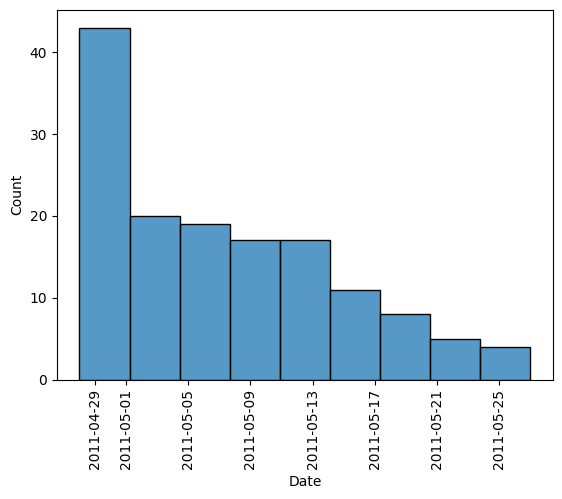

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# The next few code chunks are to create the plots for each dataset to seperatetly do some exploratory data analysis and understand the makeup of the new datasets.
sns.histplot(x='Date',data=FF5_clean2011_3)
plt.xticks(rotation=90)

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01')])

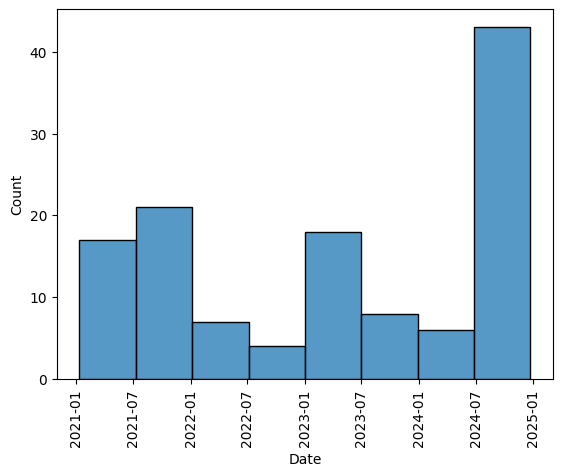

In [183]:
sns.histplot(x='Date',data=FF5_clean_dec2)
plt.xticks(rotation=90)

<Axes: xlabel='Rating'>

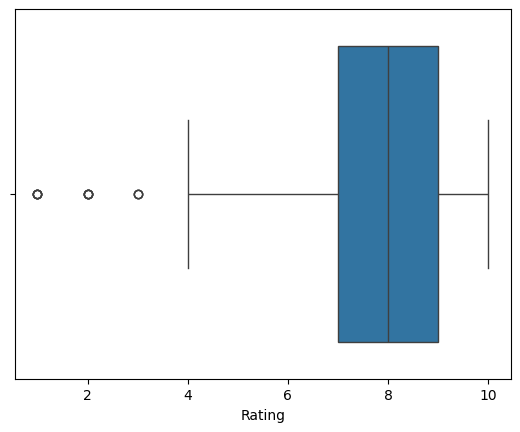

In [165]:
sns.boxplot(data=FF5_clean2011_3, x="Rating")

<Axes: xlabel='Rating'>

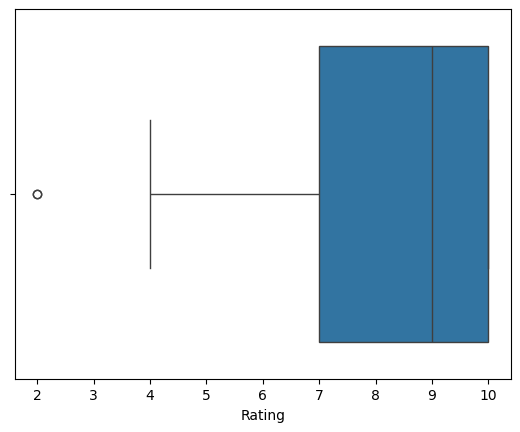

In [177]:
sns.boxplot(data=FF5_clean_dec2, x="Rating")